In [1]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'



Toggle code

In [4]:
f2f_harmonised_values = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_values.zip", compression='zip')

In [51]:
f2f_harmonised_values

,unconventional,ordinary,rich,respect,censorship,strongtu,enterprise,toughlaw,death,ec_left_right,soc_lib_auth,soc_lib_auth_complete,ec_left_right_complete
index,,,,,,,,,,,,,
0,1.0,0.0,1.0,3.0,3.0,1.0,3.0,4.0,1.0,5.0,11.0,11.0,5.0
1,2.0,0.0,0.0,4.0,3.0,0.0,3.0,2.0,4.0,3.0,13.0,13.0,3.0
2,3.0,1.0,3.0,3.0,3.0,0.0,1.0,2.0,0.0,5.0,8.0,8.0,5.0
3,1.0,1.0,1.0,4.0,1.0,NaN,NaN,3.0,4.0,4.0,12.0,12.0,4.0
4,1.0,1.0,0.0,3.0,3.0,2.0,1.0,2.0,3.0,4.0,11.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
f2f_harmonised_values
## should have kept the uids!

,unconventional,ordinary,rich,respect,censorship,strongtu,enterprise,toughlaw,death,ec_left_right,soc_lib_auth,soc_lib_auth_complete,ec_left_right_complete
index,,,,,,,,,,,,,
0,1.0,0.0,1.0,3.0,3.0,1.0,3.0,4.0,1.0,5.0,11.0,11.0,5.0
1,2.0,0.0,0.0,4.0,3.0,0.0,3.0,2.0,4.0,3.0,13.0,13.0,3.0
2,3.0,1.0,3.0,3.0,3.0,0.0,1.0,2.0,0.0,5.0,8.0,8.0,5.0
3,1.0,1.0,1.0,4.0,1.0,NaN,NaN,3.0,4.0,4.0,12.0,12.0,4.0
4,1.0,1.0,0.0,3.0,3.0,2.0,1.0,2.0,3.0,4.0,11.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
f2f_harmonised

,dataset,uid,housing_det,housing,inc,vote,year,wt,age,vote_simple,...,REFUK,SNP,GP,DK,PC,decade,generation,inc_norm,inc_norm_wt,inc(quartile)
index,,,,,,,,,,,,,,,,,,,,,
0,2019,2019|0,MORT,OWN,15.6-26k,DNV,2019,0.926940,34.0,DNV,...,0.0,0.0,0.0,0.0,0.0,3.4,1.70,0.357143,0.25,1.0
1,2019,2019|1,RENT-PR,RENT,NaN,DNV,2019,NaN,45.0,DNV,...,0.0,0.0,0.0,0.0,0.0,4.5,2.25,0.214286,NaN,NaN
2,2019,2019|2,MORT,OWN,26-36.4k,LAB,2019,0.920836,33.0,LAB,...,0.0,0.0,0.0,0.0,0.0,3.3,1.65,0.500000,0.45,1.8
3,2019,2019|3,RENT-LA,RENT,0-15.6k,DNV,2019,1.197730,22.0,DNV,...,0.0,0.0,0.0,0.0,0.0,2.2,1.10,0.214286,0.15,0.6
4,2019,2019|4,RENT-LA,RENT,NaN,DNV,2019,1.979724,35.0,DNV,...,0.0,0.0,0.0,0.0,0.0,3.5,1.75,0.428571,0.40,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,1959,1959|2917,OWN-MORT,OWN,NaN,TY,1959,1.000000,14.0,NaN,...,0.0,0.0,0.0,1.0,0.0,1.4,0.70,0.333333,0.30,1.2
2918,1959,1959|2918,OWN-MORT,OWN,NaN,TY,1959,1.000000,19.0,NaN,...,0.0,0.0,0.0,1.0,0.0,1.9,0.95,0.250000,0.25,1.0
2919,1959,1959|2919,OWN-MORT,OWN,NaN,TY,1959,1.000000,13.0,NaN,...,0.0,0.0,0.0,1.0,0.0,1.3,0.65,0.166667,0.10,0.4


In [15]:
pd.concat([f2f_harmonised,f2f_harmonised_values],axis=1).drop(["nvq_sqv_l5","att_non_voc_training"],axis=1).corr().round(1)

,year,wt,age,birth_year,harmonised_voted,inc_det,gender,gender_complete,AuthRight,LibLeft,...,respect,censorship,strongtu,enterprise,toughlaw,death,ec_left_right,soc_lib_auth,soc_lib_auth_complete,ec_left_right_complete
year,1.0,0.0,0.1,0.7,-0.1,0.1,0.0,0.0,-0.1,0.0,...,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0,-0.1,-0.1,-0.0
wt,0.0,1.0,-0.1,0.1,-0.1,0.1,-0.1,-0.1,0.0,-0.1,...,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
age,0.1,-0.1,1.0,-0.6,0.1,-0.2,0.0,0.0,0.2,-0.0,...,0.2,0.2,0.1,0.2,0.1,0.0,0.1,0.2,0.2,0.1
birth_year,0.7,0.1,-0.6,1.0,-0.2,0.2,-0.0,-0.0,-0.2,0.0,...,-0.2,-0.3,-0.1,-0.2,-0.1,-0.1,-0.1,-0.2,-0.2,-0.1
harmonised_voted,-0.1,-0.1,0.1,-0.2,1.0,0.1,-0.0,-0.0,0.3,0.4,...,-0.0,0.0,0.0,0.0,-0.0,-0.1,0.1,-0.0,-0.0,0.0
inc_det,0.1,0.1,-0.2,0.2,0.1,1.0,-0.1,-0.1,0.1,-0.1,...,-0.2,-0.2,0.0,0.1,-0.1,-0.1,0.2,-0.2,-0.2,0.1
gender,0.0,-0.1,0.0,-0.0,-0.0,-0.1,1.0,1.0,0.0,-0.0,...,-0.0,0.2,0.0,-0.1,0.0,-0.1,-0.0,0.0,0.0,-0.0
gender_complete,0.0,-0.1,0.0,-0.0,-0.0,-0.1,1.0,1.0,0.0,-0.0,...,-0.0,0.2,0.0,-0.1,0.0,-0.1,-0.0,0.0,0.0,-0.0
AuthRight,-0.1,0.0,0.2,-0.2,0.3,0.1,0.0,0.0,1.0,-0.7,...,0.1,0.1,0.2,0.3,0.1,0.1,0.4,0.2,0.2,0.4
LibLeft,0.0,-0.1,-0.0,0.0,0.4,-0.1,-0.0,-0.0,-0.7,1.0,...,-0.1,-0.1,-0.2,-0.3,-0.1,-0.2,-0.3,-0.2,-0.2,-0.3


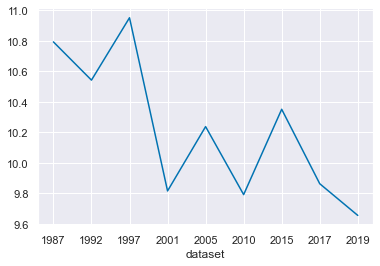

In [20]:
f2f_harmonised_values["soc_lib_auth_complete"].groupby(f2f_harmonised["dataset"]).mean().plot()

In [28]:
mask = f2f_harmonised["dataset"].isin(['2019', '2017', '2015', '2010', '2005', '2001', '1997', '1992',
       '1987',])

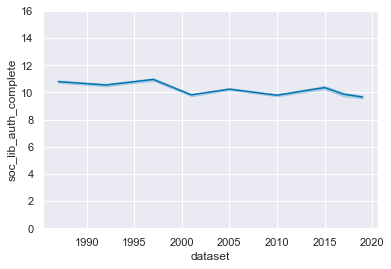

In [31]:
sns.lineplot(x=f2f_harmonised["dataset"][mask].astype('float'),y=f2f_harmonised_values["soc_lib_auth_complete"][mask]);
plt.ylim([0,16]);

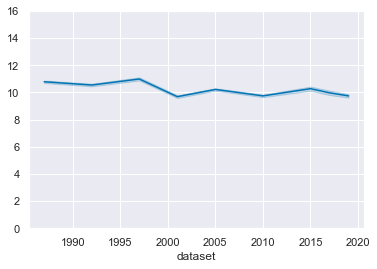

In [40]:
sns.lineplot(x=f2f_harmonised["dataset"][mask].astype('float'),y=list(zip(f2f_harmonised_values["soc_lib_auth_complete"][mask],f2f_harmonised["wt"][mask])),
                                                                      estimator=weighted_mean
                                                                     
                                                                     
                                                                     );
plt.ylim([0,16]);

In [48]:

# pd.Series(list(zip(f2f_harmonised["age"][mask],f2f_harmonised["wt"][mask])),index=f2f_harmonised["wt"][mask].index).groupby(f2f_harmonised["dataset"][mask]).apply(weighted_mean)

# # (  )

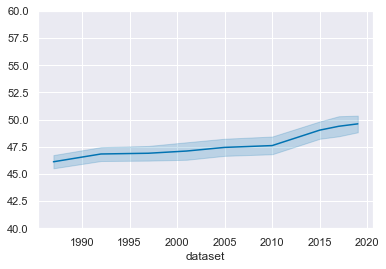

In [50]:
sns.lineplot(x=f2f_harmonised["dataset"][mask].astype('float'),y=list(zip(f2f_harmonised["age"][mask],f2f_harmonised["wt"][mask])),
                                                                      estimator=weighted_mean
                                                                     
                                                                     
                                                                     );
plt.ylim([40,60]);

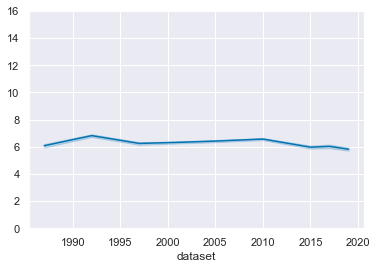

In [39]:
sns.lineplot(x=f2f_harmonised["dataset"][mask].astype('float'),y=list(zip(f2f_harmonised_values["ec_left_right_complete"][mask],f2f_harmonised["wt"][mask])),
                                                                      estimator=weighted_mean
                                                                     
                                                                     
                                                                     );
plt.ylim([0,16]);

In [22]:
f2f_harmonised_values["soc_lib_auth_complete"].describe()

count    30368.000000
mean        10.249440
std          3.022874
min          0.000000
25%          8.791177
50%         10.000000
75%         12.000000
max         16.000000
Name: soc_lib_auth_complete, dtype: float64

In [24]:
f2f_harmonised["dataset"].isin()

index
0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2917    1959
2918    1959
2919    1959
2920    1959
2921    1959
Name: dataset, Length: 52731, dtype: object

In [27]:
f2f_harmonised["dataset"].unique()

array(['2019', '2017', '2015', '2010', '2005', '2001', '1997', '1992',
       '1987', '1983', '1979', '1974_feb', '1974_oct', '1970', '1966',
       '1964', '1959'], dtype=object)

In [ ]:
## TODO - version controlling for age!